In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
import PIL.Image as Image
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import seaborn as sns
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
def read_csv(path):
    df = pd.read_csv(path)
    return df

In [3]:
df = read_csv('data/legend.csv')
df2 = read_csv('data/legend.csv')
# print(df['image'])
features = df.pop('image')
labels = df.pop('emotion')
print(type(labels))

<class 'pandas.core.series.Series'>


In [106]:
df2.head()

,user.id,image,emotion
0,628,facial-expressions_2868588k.jpg,anger
1,628,facial-expressions_2868585k.jpg,surprise
2,628,facial-expressions_2868584k.jpg,disgust
3,628,facial-expressions_2868582k.jpg,fear
4,dwdii,Aaron_Eckhart_0001.jpg,neutral


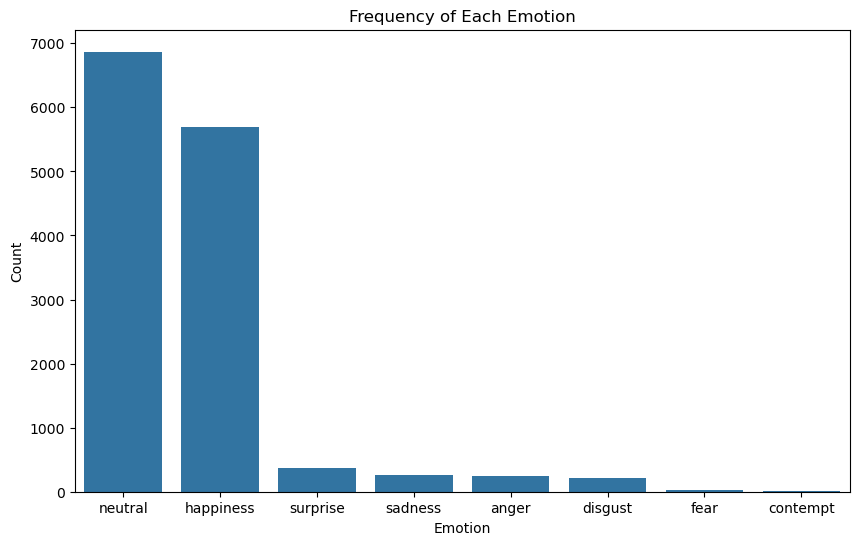

In [107]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=df2, order = df2['emotion'].value_counts().index)
plt.title('Frequency of Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [108]:
features.head()

0    facial-expressions_2868588k.jpg
1    facial-expressions_2868585k.jpg
2    facial-expressions_2868584k.jpg
3    facial-expressions_2868582k.jpg
4             Aaron_Eckhart_0001.jpg
Name: image, dtype: object

In [109]:
labels.head()

0       anger
1    surprise
2     disgust
3        fear
4     neutral
Name: emotion, dtype: object

In [4]:
neutral_data = df2[df2['emotion'] == 'neutral']
happiness_data = df2[df2['emotion'] == 'happiness']
other_data = df2[(df2['emotion'] != 'neutral') & (df2['emotion'] != 'happiness')]

# Determine the new size for 'neutral' and 'happiness' categories
# For example, let's say you want to reduce them to the size of the next largest category
target_size = int(other_data['emotion'].value_counts().mean())

# Downsample 'neutral' and 'happiness'
neutral_downsampled = neutral_data.sample(target_size, random_state=42)
happiness_downsampled = happiness_data.sample(target_size, random_state=42)

# Combine the data back together
balanced_data = pd.concat([neutral_downsampled, happiness_downsampled, other_data])

In [5]:
features_ = balanced_data.pop('image')
labels_ = balanced_data.pop('emotion')
balanced_data.head()

,user.id
2902,302
2308,302
3621,302
5304,302
10585,dwdii


In [6]:
feature_ = []
for img in features_:
    path = os.path.join('images', img)
    emotion_img = cv.imread(path)
    resized_image = cv.resize(emotion_img, (180,180))
    gray_scale = cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)
    feature_.append(gray_scale)
    # value = label[df[df['image'] == str(img)].index[0]]
    # labels.append(emo)

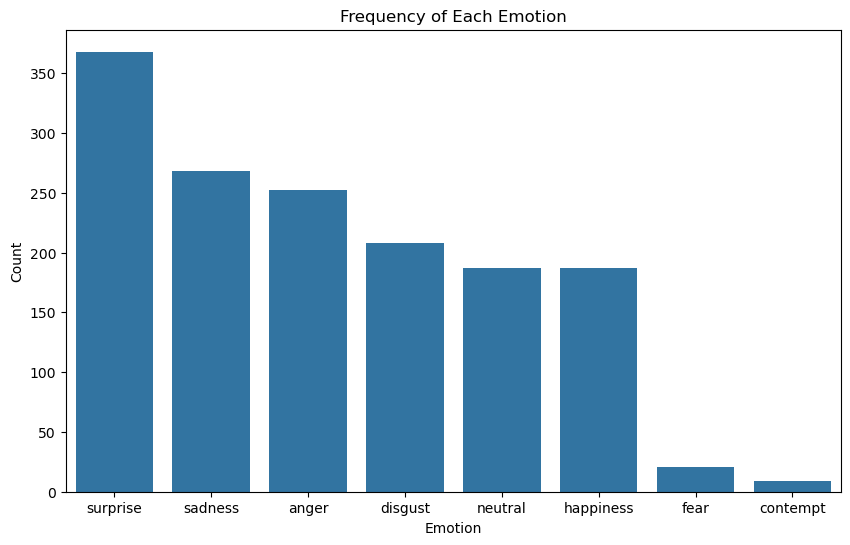

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=balanced_data, order = balanced_data['emotion'].value_counts().index)
plt.title('Frequency of Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [7]:
feature_ = np.asarray(feature_).astype('float32')
labels_ = np.array(labels_)
print(labels_.shape)
num_classes = len(np.unique(labels_))
print(num_classes)

(1500,)
8


In [82]:
feature = []
for img in features:
    path = os.path.join('images', img)
    emotion_img = cv.imread(path)
    resized_image = cv.resize(emotion_img, (180,180))
    gray_scale = cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)
    feature.append(gray_scale)
    # value = label[df[df['image'] == str(img)].index[0]]
    # labels.append(emo)
    

In [83]:
feature = np.asarray(feature).astype('float32')
labels = np.array(labels)
print(labels.shape)
# print(feature[0])

(13690,)


In [84]:
print(labels)
print(feature.shape)
num_classes = len(np.unique(labels))

['anger' 'surprise' 'disgust' ... 'happiness' 'happiness' 'happiness']
(13690, 180, 180)


In [85]:
feature = feature / 255.0

In [8]:
feature_ = feature_ / 255.0

In [12]:
# cv.imshow('gray_scaled_image (180x180)', feature[20])
# cv.waitKey(0)

27

: 

In [9]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels)
one_hot_encoded_labels = to_categorical(numerical_labels)
string_labels = label_encoder.inverse_transform(numerical_labels)

print(f'string label is {string_labels[157]}\n')

print("Original numerical labels:")
print(numerical_labels[157])
#anger = 0, surprise = 1 disgust = 2, fear = 3, happiness = 4, neutral = 5, sadness = 6,  

print("\nOne-hot encoded labels:")
print(one_hot_encoded_labels)


string label is sadness

Original numerical labels:
6

One-hot encoded labels:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels_)
one_hot_encoded_labels = to_categorical(numerical_labels)
string_labels = label_encoder.inverse_transform(numerical_labels)

print(f'string label is {string_labels[157]}\n')

print("Original numerical labels:")
print(numerical_labels[157])
#anger = 0, surprise = 1 disgust = 2, fear = 3, happiness = 4, neutral = 5, sadness = 6,  

print("\nOne-hot encoded labels:")
print(one_hot_encoded_labels)
print(string_labels)

string label is neutral

Original numerical labels:
5

One-hot encoded labels:
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
['neutral' 'neutral' 'neutral' ... 'anger' 'anger' 'anger']


In [88]:
print(string_labels)

['anger' 'surprise' 'disgust' ... 'happiness' 'happiness' 'happiness']


In [11]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(feature_, one_hot_encoded_labels, test_size = 0.2, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, one_hot_encoded_labels, test_size = 0.2, random_state=1)

In [54]:
print(X_train_.shape)
print(y_train_.shape)

(915, 180, 180)
(915, 8)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, InputLayer, Dropout
from tensorflow.keras.utils import to_categorical
model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size = (5,5), input_shape = (180, 180, 1), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (4,4), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'softmax'))
# model = load_model('dropout_applied.h5')

Metal device set to: Apple M3 Pro

systemMemory: 36.00 GB
maxCacheSize: 13.50 GB



2023-12-11 21:33:03.504764: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-11 21:33:03.505053: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
model.compile(
    optimizer = 'ADAM',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)
history = model.fit(
    X_train_, y_train_, epochs = 20, validation_data=(X_test_, y_test_),
)

Epoch 1/20


2023-12-11 21:33:05.498376: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-12-11 21:33:05.732679: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - ETA: 0s - loss: 1.8940 - accuracy: 0.2317

2023-12-11 21:33:08.324494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


38/38 [==============================] - 3s 68ms/step - loss: 1.8940 - accuracy: 0.2317 - val_loss: 1.8497 - val_accuracy: 0.2767
Epoch 2/20
38/38 [==============================] - 2s 57ms/step - loss: 1.6656 - accuracy: 0.3392 - val_loss: 1.5720 - val_accuracy: 0.4567
Epoch 3/20
11/38 [=======>......................] - ETA: 1s - loss: 1.4841 - accuracy: 0.4517

KeyboardInterrupt: 

In [ ]:
model.compile(
    optimizer = 'ADAM',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
)
history = model.fit(
    X_train, y_train, epochs = 5, validation_data=(X_test, y_test),
)

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 176, 176, 32)      832       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 88, 88, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 85, 85, 64)        32832     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 42, 42, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 20, 20, 128)     

In [64]:
model.evaluate(X_test_, y_test_)

8/8 [==============================] - 0s 20ms/step - loss: 2.6022 - accuracy: 0.6070


[2.602247476577759, 0.6069868803024292]

(180, 180)
(915, 180, 180)
1/1 [==============================] - 0s 128ms/step
Prediction = ['sadness']


2023-12-11 18:12:40.781558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


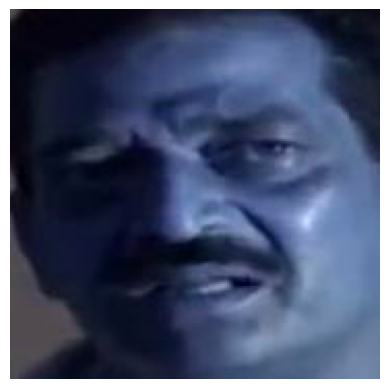

In [65]:
im = 'Avinash_2.jpg'
path = os.path.join('images', im)
test_img = cv.imread(path)
resized_test_img = cv.resize(test_img, (180,180))
resized_test_img = cv.cvtColor(resized_test_img, cv.COLOR_BGR2GRAY)
print(resized_test_img.shape)
resized_test_img = resized_test_img.reshape(-1, 180, 180, 1)
print(X_train.shape)
hist = model.predict(resized_test_img)
print(f'Prediction = {label_encoder.inverse_transform(np.argmax(hist, axis = 1))}')
# print(f'Actual label = {df[df['image'] == im]}')
# print(df2[df2['image'] == im].emotion)
plt.imshow(test_img)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()



In [ ]:
model.save('dropout_applied_v2.h5')

In [ ]:
# from tensorflow.keras.applications import ResNet50, MobileNetV2
# base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
# mobile_model = keras.Sequential()
# mobile_model.add(base_model)
# mobile_model.add(MaxPooling2D())
# mobile_model.add(Flatten())
# mobile_model.add(Dense(8, activation='softmax')) 

In [ ]:
# base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
# res_model = keras.Sequential()
# res_model.add(base_model)
# res_model.add(MaxPooling2D())
# res_model.add(Flatten())
# res_model.add(Dense(8, activation='softmax')) 

In [ ]:
# mobile_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# mobile_model.summary()

In [ ]:
# mobile_model.fit(X_train, y_train, epochs = 1)

In [ ]:
# mobile_model.save('movilnetV2.h5')

In [ ]:
# res_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# res_model.fit(X_train, y_train, epochs = 3)

In [ ]:
# res_model.evaluate(X_test, y_test)

In [36]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [37]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs", histogram_freq=1)

# model.fit(X_train, y_train, epochs=1, callbacks=[tensorboard_callback])


342/343 [============================>.] - ETA: 0s - loss: 0.2329 - accuracy: 0.9147

InvalidArgumentError: Multiple Default OpKernel registrations match NodeDef '{{node ZerosLike}}': 'op: "ZerosLike" device_type: "DEFAULT" constraint { name: "T" allowed_values { list { type: DT_INT32 } } } host_memory_arg: "y"' and 'op: "ZerosLike" device_type: "DEFAULT" constraint { name: "T" allowed_values { list { type: DT_INT32 } } } host_memory_arg: "y"' [Op:ZerosLike]

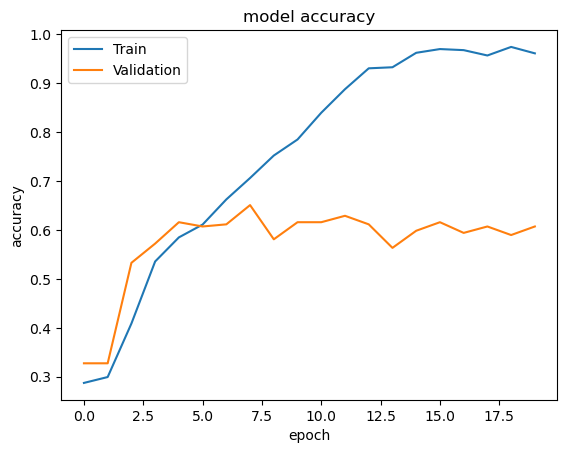

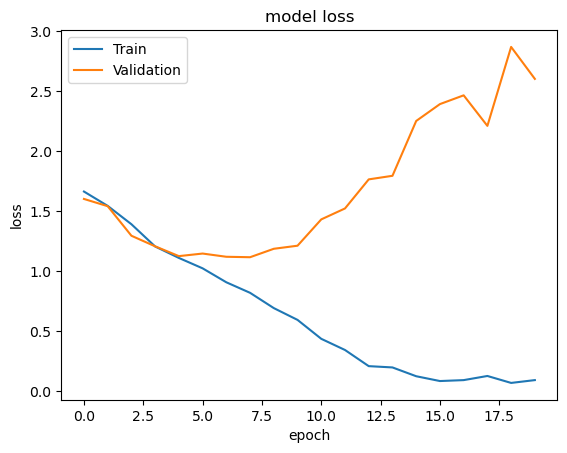

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()